In [1]:
import pandas as pd
import numpy as np

df_up = pd.read_csv(
    "../data/raw/universiteti_i_prishtines.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_fehmi = pd.read_csv(
    "../data/raw/fehmi_agani.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_ferizaj = pd.read_csv(
    "../data/raw/ferizaj_aplikuara.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_gjilan = pd.read_csv(
    "../data/raw/gjilan.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_islame = pd.read_csv(
    "../data/raw/islame.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_mitrovice = pd.read_csv(
    "../data/raw/mitrovice.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_peje = pd.read_csv(
    "../data/raw/peje.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_private = pd.read_csv(
    "../data/raw/private.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_prizren = pd.read_csv(
    "../data/raw/prizren.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)
df_siguri = pd.read_csv(
    "../data/raw/siguri publike.csv",
    encoding="iso-8859-1",
    sep=";",
    header=1,
)

dataframes = [
    df_fehmi,
    df_ferizaj,
    df_gjilan,
    df_mitrovice,
    df_peje,
    df_prizren,
    df_siguri,
]
names = [
    "Universiteti i Gjakovës Fehmi Agani",
    "Universiteti I Shkencave të Aplikuara. Ferizaj",
    "Universiteti Kadri Zeka Gjilan",
    "Universiteti Isa Boletini Mitrovicë",
    "Universiteti Haxhi Zeka Pejë",
    "Universiteti i Prizrenit Ukshin Hoti",
    "Fakulteti për Siguri Publike-Vushtrri",
]


In [4]:
df_all = pd.DataFrame(columns=df_siguri.columns)

# adding those that can be added easily
for i, df in enumerate(dataframes):
    df["Emri"] = names[i]
    # TODO Gjithsej includes stafin administrativ, remove that
    df_all = df_all.append(df.iloc[:-1,2:-1].replace(":",0).replace("-",0).astype(int).sum(axis=0), ignore_index = True)
    df_all.loc[i,"Emri"] = names[i]

In [5]:
# Adding the rest

In [6]:
# UP
df_up.rename(columns={"2017/2018 Te rregullt Femra": "Të rregullt Femra", 
                      "2017/2018 Te rregullt Meshkuj":"Të rregullt Meshkuj", 
                      "2017/2018 Te angazhuar Femra":"Të angazhuar Femra", 
                      "2017/2018 Te angazhuar Meshkuj":"Të angazhuar Meshkuj"}, inplace=True)
df_up["Emri"] = "Universiteti i Prishtinës"

In [7]:
df_all = df_all.append(df_up.iloc[:-1,1:-1].replace(":",0).replace("-",0).astype(int).sum(axis=0), ignore_index=True)

In [8]:
# Islame
df_islame["Emri"] = "Fakulteti i Studimeve Islame"
df_all = df_all.append(df_islame, ignore_index=True)

C:\Users\z0043cyc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
# Private

In [10]:
df_private.rename(columns={"kolegji":"Emri"}, inplace=True)
df_private["Emri"] = "Kolegji " + df_private["Emri"].values

In [11]:
df_all = df_all.append(df_private.loc[df_private["Emri"]=="Kolegji AAB"], ignore_index=True)
df_all = df_all.append(df_private.loc[df_private["Emri"]=="Kolegji Fama"], ignore_index=True)
df_all = df_all.append(df_private.loc[df_private["Emri"]=="Kolegji UBT"], ignore_index=True)

In [12]:
df = df_all[["Emri", "Të angazhuar Femra", "Të angazhuar Meshkuj", "Të rregullt Femra", "Të rregullt Meshkuj"]]

In [13]:
df["Femra"] = df["Të angazhuar Femra"].astype(int) + df["Të rregullt Femra"].astype(int)

C:\Users\z0043cyc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df["Meshkuj"] = df["Të angazhuar Meshkuj"].astype(int) + df["Të rregullt Meshkuj"].astype(int)

C:\Users\z0043cyc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df["Total"] = df["Femra"].astype(int) + df["Meshkuj"].astype(int)

C:\Users\z0043cyc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df["Perqindja Femra"] = df["Femra"] / df["Total"]

C:\Users\z0043cyc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df["Perqindja Meshkuj"] = df["Meshkuj"] / df["Total"]

In [18]:
df.to_csv("../data/processed/gender-equality-tertiary-kosovo.csv", index=False)

In [19]:
# Total
df_all = df_all.append(df_private.loc[df_private["Emri"]=="Kolegji Gjithsej"], ignore_index=True)

In [20]:
# TODO(Fix this possible error)
df_all.drop([9,10,11]).reset_index(drop=True, inplace=True)

In [21]:
df_all["Femra"] = df_all["Të angazhuar Femra"].astype(int) + df_all["Të rregullt Femra"].astype(int)
df_all["Meshkuj"] = df_all["Të angazhuar Meshkuj"].astype(int) + df_all["Të rregullt Meshkuj"].astype(int)
df_all["Total"] = df_all["Femra"].astype(int) + df_all["Meshkuj"].astype(int)
df_all["Perqindja Femra"] = df_all["Femra"] / df_all["Total"]
df_all["Perqindja Meshkuj"] = df_all["Meshkuj"] / df_all["Total"]

In [22]:
df.iloc[:,1:5] = df.iloc[:,1:5].apply(pd.to_numeric)

In [23]:
df.append(df.sum(numeric_only=True), ignore_index=True).to_csv("../data/processed/gender-equality.csv", index=False)
# TODO (Fix percentage calculation)

# Visualization

In [195]:
import matplotlib.pyplot as plt

In [206]:
labels = "Femra", "Meshkuj"

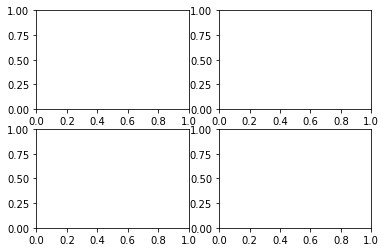

In [196]:
# Make figure and axes
fig, axs = plt.subplots(2, 2)

In [211]:
# A standard pie plot
axs[0, 0].pie(df[["Perqindja Femra", "Perqindja Meshkuj"]].loc[df["Emri"]=="Kolegji Fama"].values, autopct='%1.1f%%')

TypeError: only size-1 arrays can be converted to Python scalars